In [1]:
#i am going to take a scanned document and then extract relevant data from it. let me see what i can do.
# lets see what is my image.
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

sample6 = "../pan1_scanned.jpg"
img = rgb2gray(imread(sample6))
plt.imshow(img, cmap="gray")
plt.show()

<Figure size 640x480 with 1 Axes>

first angle: 1
fine tuned angle: 1.09


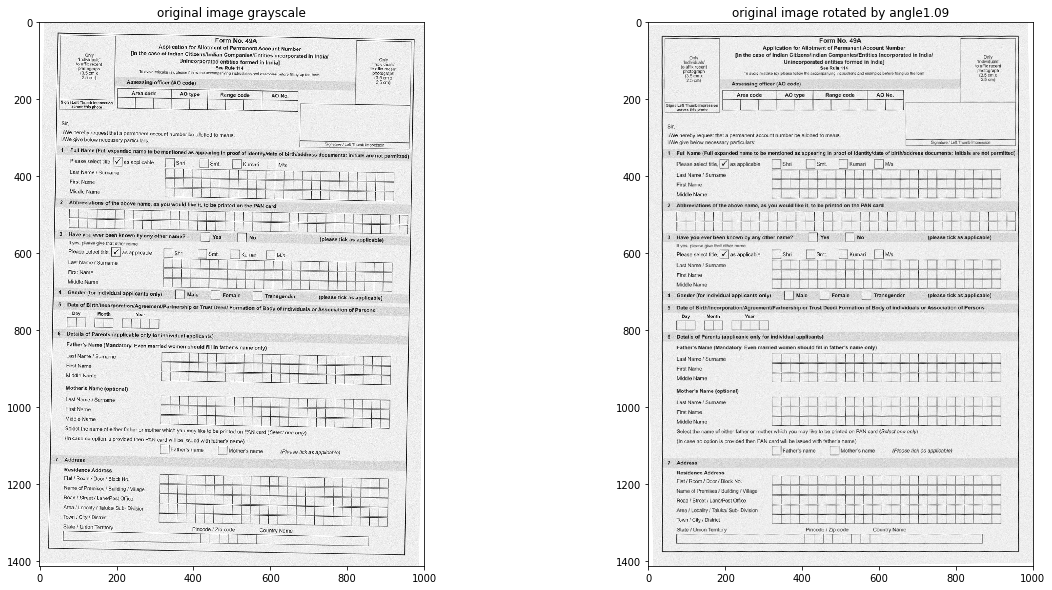

In [5]:
#first thing is get the doc and fix the skew.
from skimage.filters import sobel
from skimage.util import invert
import numpy as np
from skimage.transform import rotate

sobel_image = invert(sobel(img))

#find the horizontal projection of all the rows in the image
#rotate the image between angles -10 to 10 degrees and find the angle which gives the least median of horizontal projection
def horizontal_projections(sobel_image):
    sum_of_cols = []
    rows,cols = sobel_image.shape
    for row in range(rows-1):
        sum_of_cols.append(np.sum(sobel_image[row,:]))
    
    return sum_of_cols

rows,cols = sobel_image.shape
predicted_angle = 0
highest_hp = 0
for index,angle in enumerate(range(-10,10)):
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
    median_hp = np.median(hp)
    if highest_hp < median_hp:
        predicted_angle = angle
        highest_hp = median_hp

print 'first angle:',predicted_angle
#this first angle gives me an approximate angle where my actual rotation may be present. I will fine tune this 
#further with a better angle.

finetuning_range = np.arange(predicted_angle-1.0, predicted_angle+1.0, 0.01)
for index,angle in enumerate(finetuning_range):
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
    median_hp = np.median(hp)
    if highest_hp < median_hp:
        predicted_angle = angle
        highest_hp = median_hp  

print 'fine tuned angle:',predicted_angle

step1_image = rotate(img, predicted_angle, cval=1)

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_title('original image grayscale')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('original image rotated by angle'+str(predicted_angle))
ax[1].imshow(step1_image, cmap="gray")

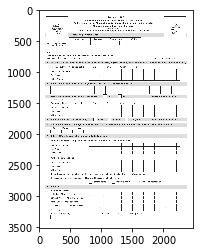

In [6]:
#now i need to find out how much is the image transformed from its template. 
#lets get the template and see what it contains.
template = "../pan1.jpg"
template_img = rgb2gray(imread(template))
plt.imshow(template_img, cmap="gray")
plt.show()

In [7]:
from skimage.io import imsave

imsave('/home/wolf/ml_research/step1_image.jpg',step1_image)